In [46]:
%matplotlib inline

Penguins

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
# Load the penguins dataset
file_path = r'C:\Kodilla\Penguins\penguins.csv'
penguins_df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
penguins_df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [49]:
# Drop rows with missing values
penguins_df_cleaned = penguins_df.dropna()

# Display the cleaned dataset structure
penguins_df_cleaned.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.757310
std,5.459584,1.974793,14.061714,801.954536,0.763648
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


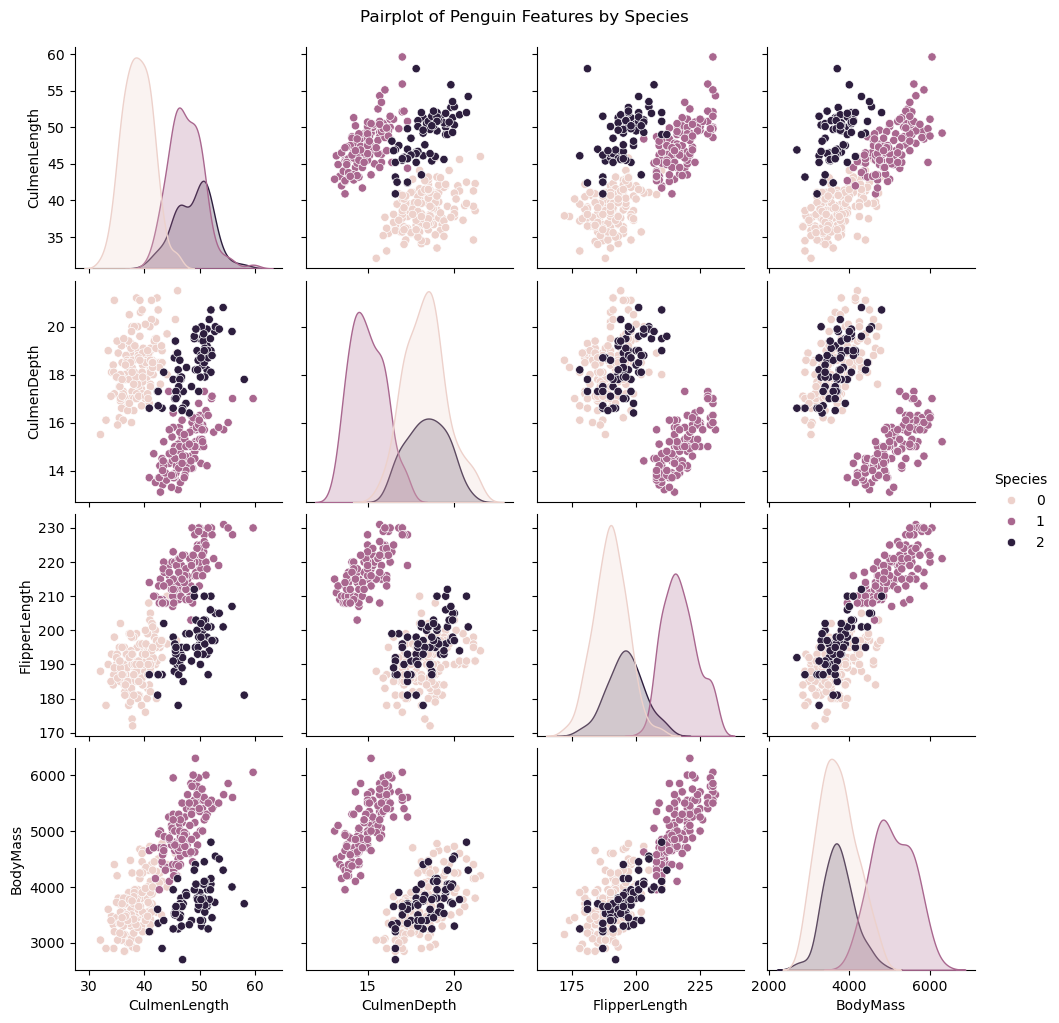

In [50]:
# Pairplot to visualize the relationships between features and species
sns.pairplot(penguins_df_cleaned, hue="Species", diag_kind="kde")
plt.suptitle("Pairplot of Penguin Features by Species", y=1.02)
plt.show()

In [51]:
penguins_df_cleaned.dtypes

CulmenLength     float64
CulmenDepth      float64
FlipperLength    float64
BodyMass         float64
Species            int64
dtype: object

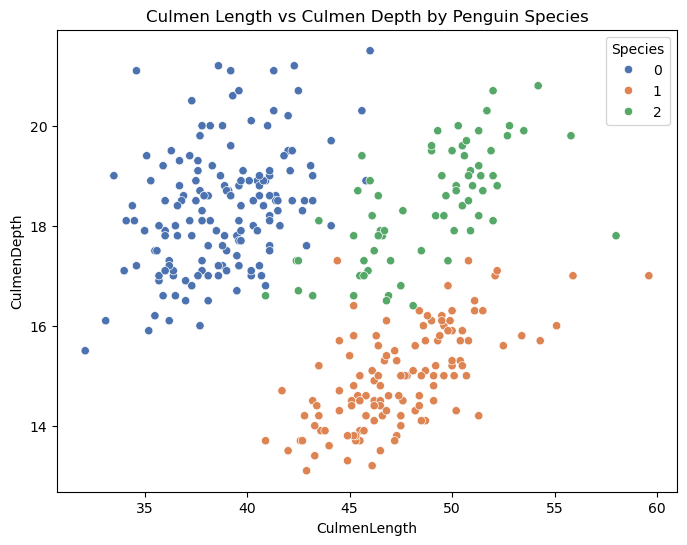

In [52]:
# Scatter plot for CulmenLength vs CulmenDepth colored by Species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins_df_cleaned, x='CulmenLength', y='CulmenDepth', hue='Species', palette='deep')
plt.title('Culmen Length vs Culmen Depth by Penguin Species')
plt.show()

In [53]:
# Step 3: Define X (features) and y (target)
# Assuming 'Species' is the target column and the rest are features
X = penguins_df_cleaned.drop(columns='Species')  # Features
y = penguins_df_cleaned['Species']  # Target (Species)

In [54]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Step 6: Function to calculate various metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Step 7: Initialize the classifiers
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

# Step 8: Dictionary of models
models = {
    "KNN": knn,
    "Decision Tree": decision_tree,
    "SVM": svm,
    "Random Forest": random_forest,
    "AdaBoost": adaboost
}

# Step 9: Train and evaluate each model, capturing multiple metrics
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Step 10: Voting classifier (ensemble model)
voting_clf = VotingClassifier(estimators=[
    ('knn', knn), 
    ('decision_tree', decision_tree), 
    ('svm', svm), 
    ('random_forest', random_forest), 
    ('adaboost', adaboost)], voting='hard')

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_voting)
results.append({
    'Model': 'Voting Classifier',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Step 11: Convert the results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               Model  Accuracy  Precision    Recall  F1 Score
0                KNN  0.985507   0.986715  0.985507  0.985717
1      Decision Tree  0.956522   0.965839  0.956522  0.958157
2                SVM  0.985507   0.986715  0.985507  0.985717
3      Random Forest  0.971014   0.975474  0.971014  0.971796
4           AdaBoost  0.840580   0.719282  0.840580  0.771694
5  Voting Classifier  0.985507   0.986715  0.985507  0.985717


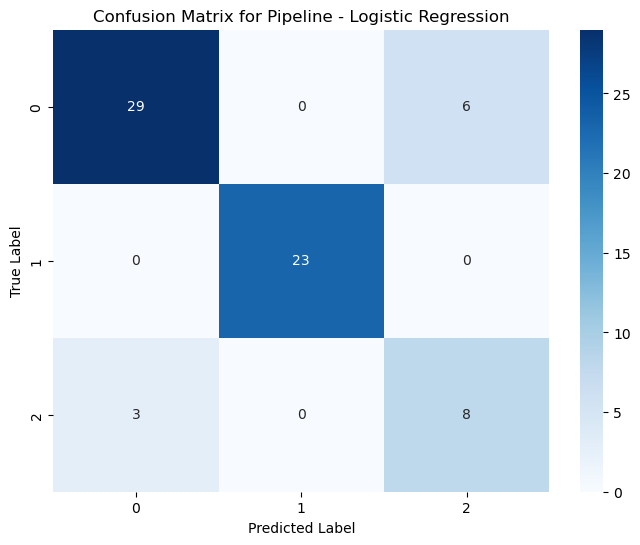

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       1.00      1.00      1.00        23
           2       0.57      0.73      0.64        11

    accuracy                           0.87        69
   macro avg       0.83      0.85      0.84        69
weighted avg       0.88      0.87      0.87        69



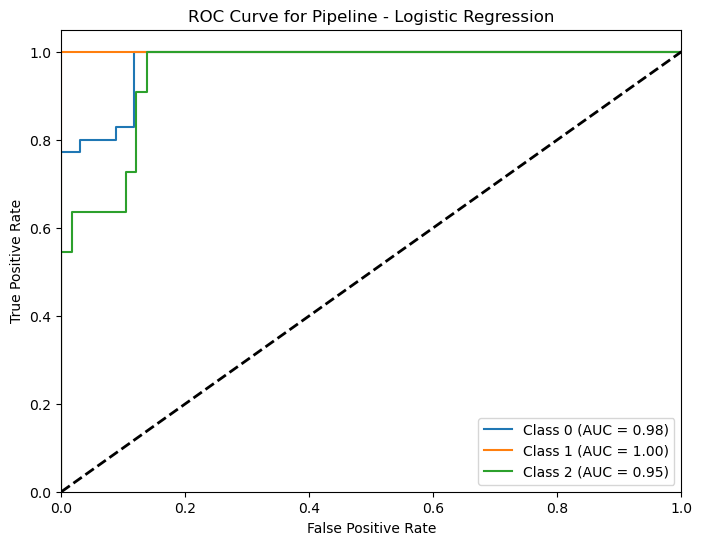

C:\Users\DELL\AppData\Local\Temp\ipykernel_13648\590932737.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


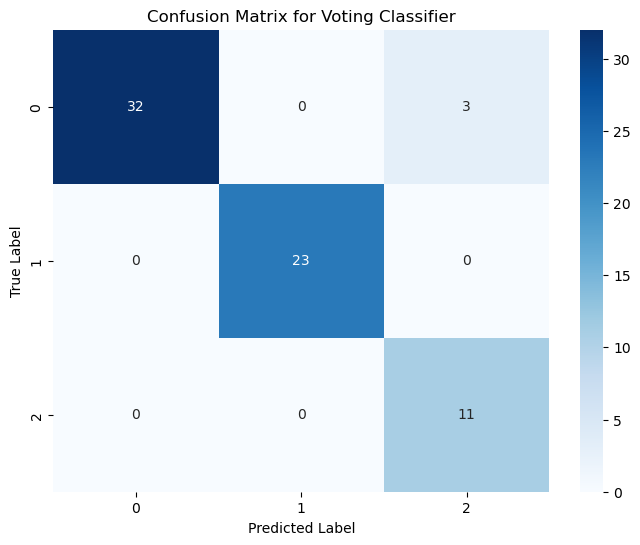

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       1.00      1.00      1.00        23
           2       0.79      1.00      0.88        11

    accuracy                           0.96        69
   macro avg       0.93      0.97      0.95        69
weighted avg       0.97      0.96      0.96        69



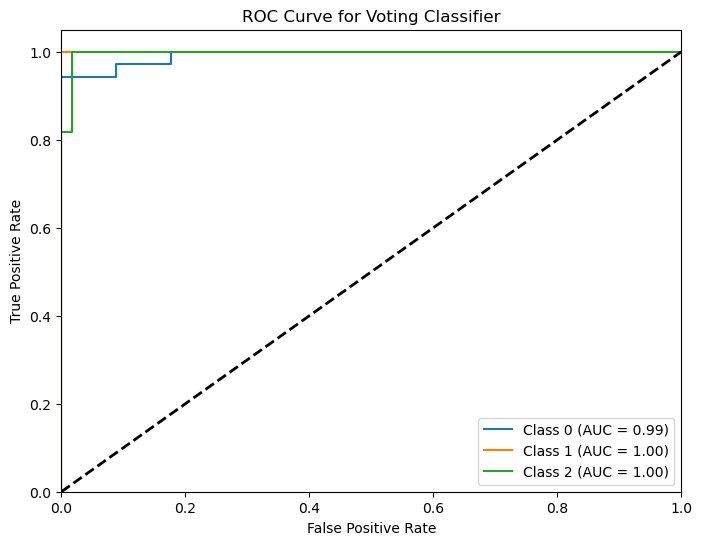

                            Model  F1_score       AUC
0  Pipeline - Logistic Regression  0.874471  0.977005
1               Voting Classifier  0.958157  0.996434


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Assuming the penguins dataset is already loaded as penguins_df_cleaned
# X - features, y - target (Species)
X = penguins_df_cleaned.drop(columns='Species')
y = penguins_df_cleaned['Species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DataFrame to store the metrics results
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])

# Function to calculate metrics and generate confusion matrix and ROC curve
def calculate_metrics_and_plots(model, name, X_test, y_test):
    global metrics_dataframe
    predictions = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_test, predictions))

    # Calculate F1 and AUC
    f1_metric = f1_score(y_test, predictions, average='weighted')

    # ROC Curve (one-vs-rest for multiclass classification)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 species
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba
        y_score = model.predict_proba(X_test)
        auc_metric = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
        fpr = {}
        tpr = {}
        roc_auc = {}
        plt.figure(figsize=(8, 6))
        for i in range(3):  # Assuming 3 classes for multiclass classification
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()

    else:
        auc_metric = None

    # Append metrics to the DataFrame using pd.concat()
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    return metrics_dataframe

# Creating the pipeline to prepare the data and train the model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation to fill missing values
    ('scaler', StandardScaler()),                 # Scaling the features
    ('pca', PCA(n_components=2)),                 # PCA to reduce dimensions
    ('classifier', LogisticRegression(random_state=42))  # Logistic Regression classifier
])

# Training the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model for the pipeline
metrics_dataframe = calculate_metrics_and_plots(pipeline, 'Pipeline - Logistic Regression', X_test, y_test)

# Voting classifier (ensemble model)
voting_clf = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier()), 
    ('decision_tree', DecisionTreeClassifier(random_state=42)), 
    ('svm', SVC(random_state=42, probability=True)), 
    ('random_forest', RandomForestClassifier(random_state=42)), 
    ('adaboost', AdaBoostClassifier(random_state=42))
], voting='soft')  # 'soft' to enable predict_proba

# Training the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the model for the voting classifier
metrics_dataframe = calculate_metrics_and_plots(voting_clf, 'Voting Classifier', X_test, y_test)

# Display the metrics results in a DataFrame
print(metrics_dataframe)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'classifier__C': 21.54434690031882, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'pca__n_components': 3}


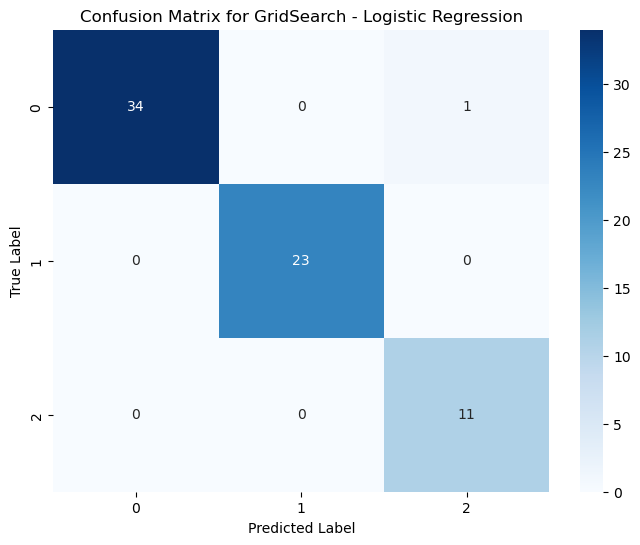

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      1.00      1.00        23
           2       0.92      1.00      0.96        11

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



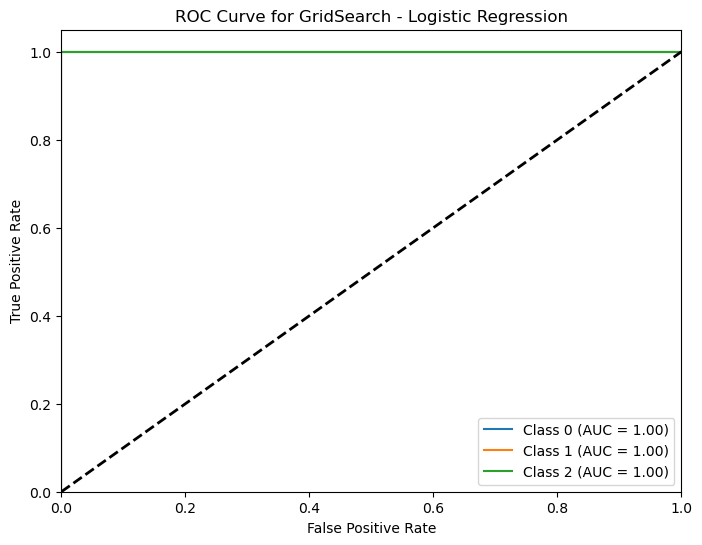

                              Model  F1_score       AUC
0    Pipeline - Logistic Regression  0.874471  0.977005
1                 Voting Classifier  0.958157  0.996434
2  GridSearch - Logistic Regression  0.341416  0.950807
3  GridSearch - Logistic Regression  0.985717  1.000000
4  GridSearch - Logistic Regression  0.985717  1.000000
5  GridSearch - Logistic Regression  0.985717  1.000000
6  GridSearch - Logistic Regression  0.985717  1.000000
7  GridSearch - Logistic Regression  0.985717  1.000000


In [58]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the pipeline (same as before)
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation to fill missing values
    ('scaler', StandardScaler()),                 # Scaling the features
    ('pca', PCA()),                               # PCA to reduce dimensions (we will tune the n_components)
    ('classifier', LogisticRegression(random_state=42))  # Logistic Regression classifier
])

# Number of features in your dataset (assuming X_train is already defined)
n_features = X_train.shape[1]

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [2, 3, min(5, n_features)],  # Limit PCA components to be less than or equal to the number of features
    'classifier__C': np.logspace(-4, 4, 10),  # Tuning regularization parameter for Logistic Regression
    'classifier__penalty': ['l2'],  # Regularization type for Logistic Regression
    'classifier__solver': ['lbfgs'],  # Solver for Logistic Regression
}

# Set up GridSearchCV with error handling
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1, error_score=np.nan)

# Fit the GridSearch to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and best model
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model using our previous function
metrics_dataframe = calculate_metrics_and_plots(best_model, 'GridSearch - Logistic Regression', X_test, y_test)

# Display the updated metrics DataFrame
print(metrics_dataframe)
